In [1]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import urlopen
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import statsmodels.api as sm
import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

try:
    salary_table = pd.read_csv('salary.table')
except:  # recent pandas can read URL without urlopen
    url = 'http://stats191.stanford.edu/data/salary.table'
    fh = urlopen(url)
    salary_table = pd.read_table(fh)
    salary_table.to_csv('salary.table')


D:\ancoda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
E = salary_table.E
M = salary_table.M
X = salary_table.X
S = salary_table.S
print(E)

0     1
1     3
2     3
3     2
4     3
5     2
6     2
7     1
8     3
9     2
10    1
11    2
12    3
13    1
14    3
15    3
16    2
17    2
18    3
19    1
20    1
21    3
22    2
23    2
24    1
25    2
26    1
27    3
28    1
29    1
30    2
31    3
32    2
33    2
34    1
35    2
36    3
37    1
38    2
39    2
40    3
41    2
42    2
43    1
44    2
45    1
Name: E, dtype: int64


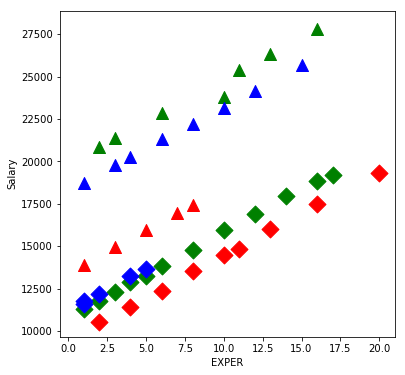

In [5]:
plt.figure(figsize=(6,6))
symbols=['D', '^']
colors =['r','g','blue']
factor_groups = salary_table.groupby(['E','M'])
for values, group in factor_groups:
    i,j=values
    plt.scatter(group['X'],group['S'], marker=symbols[j],color=colors[i-1],s=144)
plt.xlabel('EXPER')
plt.ylabel('Salary')


In [6]:
print(factor_groups)

In [9]:
formula = 'S~C(E) +C(M)+X'
lm = ols(formula, salary_table).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Tue, 24 Oct 2017   Prob (F-statistic):           2.23e-27
Time:                        18:55:17   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0

In [ ]:
print(lm.model.exog[:5])
print(lm.model.data.orig_exog[:10])
print(lm.model.data.frame[:5])

